**IMPORTING LIBRARIES**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**READING THE DATASET**

In [47]:
df = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

In [48]:
from warnings import filterwarnings
filterwarnings('ignore')

**Pre-Processing The Dataset**

In [49]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36806 entries, 0 to 36805
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(21), object(57)
memory usage: 37.9+ MB


In [51]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [52]:
df.shape

(36806, 135)

In [53]:
df.nunique()

eventid       36806
iyear            20
imonth           13
iday             32
approxdate       22
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related        2000
Length: 135, dtype: int64

In [54]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.680600e+04,36806.000000,36806.00000,36806.000000,36806.000000,36806.000000,36806.000000,34780.000000,3.478000e+04,36806.000000,...,5.240000e+02,1.0,1.160000e+02,2.0,938.000000,715.000000,36805.000000,36805.000000,36805.000000,36805.000000
mean,1.982114e+11,1982.048552,6.38328,15.264875,0.016247,156.611531,5.147911,18.004364,-2.507041e+03,1.403249,...,3.378601e+06,20000.0,1.069592e+06,0.0,2.962687,9.711888,-3.134004,-3.089118,0.161011,-2.373645
std,4.520394e+08,4.520587,3.39337,8.848823,0.126427,144.464407,3.178581,25.571636,4.621376e+05,1.093297,...,4.407848e+07,NaN,4.259471e+06,0.0,1.364160,34.650650,4.368143,4.423656,0.769660,4.311093
min,1.970000e+11,1970.000000,0.00000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979090e+11,1979.000000,3.00000,8.000000,0.000000,61.000000,2.000000,4.667128,-7.701538e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.983033e+11,1983.000000,6.00000,15.000000,0.000000,110.000000,3.000000,14.596051,-6.321889e+01,1.000000,...,0.000000e+00,20000.0,2.700000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.986032e+11,1986.000000,9.00000,23.000000,0.000000,185.000000,8.000000,40.697132,1.249007e+01,1.000000,...,4.402500e+05,20000.0,5.000000e+05,0.0,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000
max,1.989011e+11,1989.000000,12.00000,31.000000,1.000000,605.000000,12.000000,64.837778,1.784419e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,390.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.duplicated().sum()

0

In [56]:
df.columns.nunique()

135

In [57]:
df['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [58]:
df['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [59]:
df.replace(np.nan,'0',inplace=True)

In [60]:
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [61]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG       object
INT_IDEO      object
INT_MISC      object
INT_ANY       object
related       object
Length: 135, dtype: object

In [62]:
df[df['country']==1].head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [63]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,...,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,guncertain1,individual,weaptype1
eventid,1.000000,0.999954,-0.000316,0.007181,-0.042072,-0.264930,-0.075430,0.124994,0.058991,-0.000039,...,-0.078046,0.030222,0.120725,0.045584,0.018874,-0.063767,0.088361,0.038659,-0.022526,-0.036346
iyear,0.999954,1.000000,-0.007873,0.006937,-0.042027,-0.264946,-0.075188,0.125129,0.059036,-0.000374,...,-0.078049,0.030273,0.120964,0.045551,0.018755,-0.063542,0.088395,0.038770,-0.022552,-0.036061
imonth,-0.000316,-0.007873,1.000000,0.012627,0.000051,0.004088,-0.027486,-0.020013,-0.007099,-0.001169,...,0.002712,-0.005098,-0.033987,0.005439,0.015610,-0.029830,-0.007133,-0.012934,0.003201,-0.037603
iday,0.007181,0.006937,0.012627,1.000000,-0.005547,0.015720,0.013217,-0.021879,-0.005435,0.009618,...,0.007390,-0.003189,-0.004691,0.004991,-0.002128,-0.032558,-0.014817,0.008134,-0.003554,-0.016661
extended,-0.042072,-0.042027,0.000051,-0.005547,1.000000,-0.045836,0.001051,0.015697,-0.004517,-0.003588,...,0.038975,-0.040399,-0.026430,0.036388,-0.003850,0.161165,-0.026787,-0.012765,0.006303,0.208613
country,-0.264930,-0.264946,0.004088,0.015720,-0.045836,1.000000,0.343599,-0.087500,-0.009248,0.034473,...,-0.040347,0.107857,-0.071135,-0.053160,-0.009295,-0.073014,-0.045972,-0.038728,0.009120,-0.067071
region,-0.075430,-0.075188,-0.027486,0.013217,0.001051,0.343599,1.000000,-0.079485,0.046020,0.025619,...,0.079933,-0.073774,-0.112845,-0.077569,0.044587,-0.026087,-0.036137,-0.028906,-0.037516,0.032795
specificity,0.124994,0.125129,-0.020013,-0.021879,0.015697,-0.087500,-0.079485,1.000000,0.061788,-0.000312,...,-0.116089,0.046453,0.077272,0.058037,-0.000255,0.024291,0.079118,-0.021860,-0.012840,0.049023
vicinity,0.058991,0.059036,-0.007099,-0.005435,-0.004517,-0.009248,0.046020,0.061788,1.000000,-0.000721,...,-0.075322,0.033716,-0.012794,0.019812,0.013214,-0.000173,0.031363,-0.006111,0.003346,-0.000374
crit1,-0.000039,-0.000374,-0.001169,0.009618,-0.003588,0.034473,0.025619,-0.000312,-0.000721,1.000000,...,-0.036800,-0.027441,0.025083,-0.013210,0.002623,0.046918,-0.083691,0.020546,0.003356,0.035317


In [64]:
df.dropna(inplace=True)

In [65]:
df = df[['eventid','iyear','imonth','iday','approxdate','extended','country','country_txt','region','latitude','longitude','city','specificity','crit1','targtype1','weapsubtype1_txt']]


In [66]:
df.isna()

,eventid,iyear,imonth,iday,approxdate,extended,country,country_txt,region,latitude,longitude,city,specificity,crit1,targtype1,weapsubtype1_txt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'country', 'country_txt', 'region', 'latitude', 'longitude', 'city',
       'specificity', 'crit1', 'targtype1', 'weapsubtype1_txt'],
      dtype='object')

In [68]:
df=df.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country_name','region':'Region','longitude':'Long','latitude':'Latitude','city':'City','targtype1':'TargetType','weapsubtype1_txt':'WeapSubType1'})

In [69]:
df.columns

Index(['EventID', 'Year', 'Month', 'Day', 'approxdate', 'Extended', 'country',
       'Country_name', 'Region', 'Latitude', 'Long', 'City', 'specificity',
       'crit1', 'TargetType', 'WeapSubType1'],
      dtype='object')

In [70]:
df

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
0,197000000001,1970,7,2,0,0,58,Dominican Republic,2,18.456792,-69.951164,Santo Domingo,1,1,14,0
1,197000000002,1970,0,0,0,0,130,Mexico,1,19.371887,-99.086624,Mexico city,1,1,7,0
2,197001000001,1970,1,0,0,0,160,Philippines,5,15.478598,120.599741,Unknown,4,1,10,0
3,197001000002,1970,1,0,0,0,78,Greece,8,37.99749,23.762728,Athens,1,1,7,Unknown Explosive Type
4,197001000003,1970,1,0,0,0,101,Japan,4,33.580412,130.396361,Fukouka,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36801,198901070004,1989,1,7,0,0,183,South Africa,11,-26.1072,28.058292,Sandton,1,1,21,Unknown Explosive Type
36802,198901070005,1989,1,7,0,0,159,Peru,3,0,0,El Boqueron del Padre del Abad,5,1,3,Automatic or Semi-Automatic Rifle
36803,198901070006,1989,1,7,0,0,159,Peru,3,-11.967368,-76.978462,Lima,1,1,3,Automatic or Semi-Automatic Rifle
36804,198901070007,1989,1,7,0,0,159,Peru,3,-14.295196,-73.2423,Chalhuanca district,3,1,3,Automatic or Semi-Automatic Rifle


In [71]:
df['Day'].sum()

561839

In [72]:
df.head()

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
0,197000000001,1970,7,2,0,0,58,Dominican Republic,2,18.456792,-69.951164,Santo Domingo,1,1,14,0
1,197000000002,1970,0,0,0,0,130,Mexico,1,19.371887,-99.086624,Mexico city,1,1,7,0
2,197001000001,1970,1,0,0,0,160,Philippines,5,15.478598,120.599741,Unknown,4,1,10,0
3,197001000002,1970,1,0,0,0,78,Greece,8,37.99749,23.762728,Athens,1,1,7,Unknown Explosive Type
4,197001000003,1970,1,0,0,0,101,Japan,4,33.580412,130.396361,Fukouka,1,1,7,0


In [73]:
per_Nan = [(c, df[c].isna().mean()*100) for c in df]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])
per_Nan

,column_name,Percentage
0,EventID,0.0
1,Year,0.0
2,Month,0.0
3,Day,0.0
4,approxdate,0.0
5,Extended,0.0
6,country,0.0
7,Country_name,0.0
8,Region,0.0
9,Latitude,0.0


In [74]:
number_of_affected = df[['Region','specificity','TargetType']]
number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['TargetType'], ascending = False)
number_of_affected

,Region,specificity,TargetType
2,3,13001,75494
1,2,13144,64038
6,8,10256,57512
8,10,4513,27181
5,6,3383,18645
9,11,2364,12230
0,1,2164,11938
4,5,2489,8083
3,4,188,1183
10,12,89,400


In [75]:
df.tail()

,EventID,Year,Month,Day,approxdate,Extended,country,Country_name,Region,Latitude,Long,City,specificity,crit1,TargetType,WeapSubType1
36801,198901070004,1989,1,7,0,0,183,South Africa,11,-26.1072,28.058292,Sandton,1,1,21,Unknown Explosive Type
36802,198901070005,1989,1,7,0,0,159,Peru,3,0,0,El Boqueron del Padre del Abad,5,1,3,Automatic or Semi-Automatic Rifle
36803,198901070006,1989,1,7,0,0,159,Peru,3,-11.967368,-76.978462,Lima,1,1,3,Automatic or Semi-Automatic Rifle
36804,198901070007,1989,1,7,0,0,159,Peru,3,-14.295196,-73.2423,Chalhuanca district,3,1,3,Automatic or Semi-Automatic Rifle
36805,198901070008,1989,1,7,0,0,92,India,6,30.860768,75.744748,Baddowal,1,1,14,Au


In [76]:
for col in df.columns:
  print('{} : {}'.format(col,df[col].unique()))

EventID : [197000000001 197000000002 197001000001 ... 198901070006 198901070007
 198901070008]
Year : [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989]
Month : [ 7  0  1  2  3  4  5  6  8  9 10 11 12]
Day : [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
approxdate : ['0' 'January 19-20, 1970' 'February 6-9, 1970' 'February 11-14, 1970'
 'February 16-17, 1970' 'March 16-17, 1970' 'May 27 - June 5, 1970'
 'February 25-28, 1971' 'March 6-7, 1971' 'June 14-16, 1971'
 'June 24-25, 1971' 'July 18-19, 1971' 'August 17-18, 1972'
 'September 10-14, 1972' 'March 16-17, 1974' 'June 22 - July 22, 1979'
 'January 8 - 12, 1980' 'January 12 - 17, 1980' 'April - May, 1980'
 'July 9 - 17, 1981' '10/21/1986' 'December 15-16, 1987'
 'October 25-26, 1988']
Extended : [0 1]
country : [ 58 130 160  78 101 217 218  98 499  65  83 222 362 199 102 185  30  60
  11 110  96 209 158  94 603  45  26 145 142  21

**DATA VISUALIZATION**

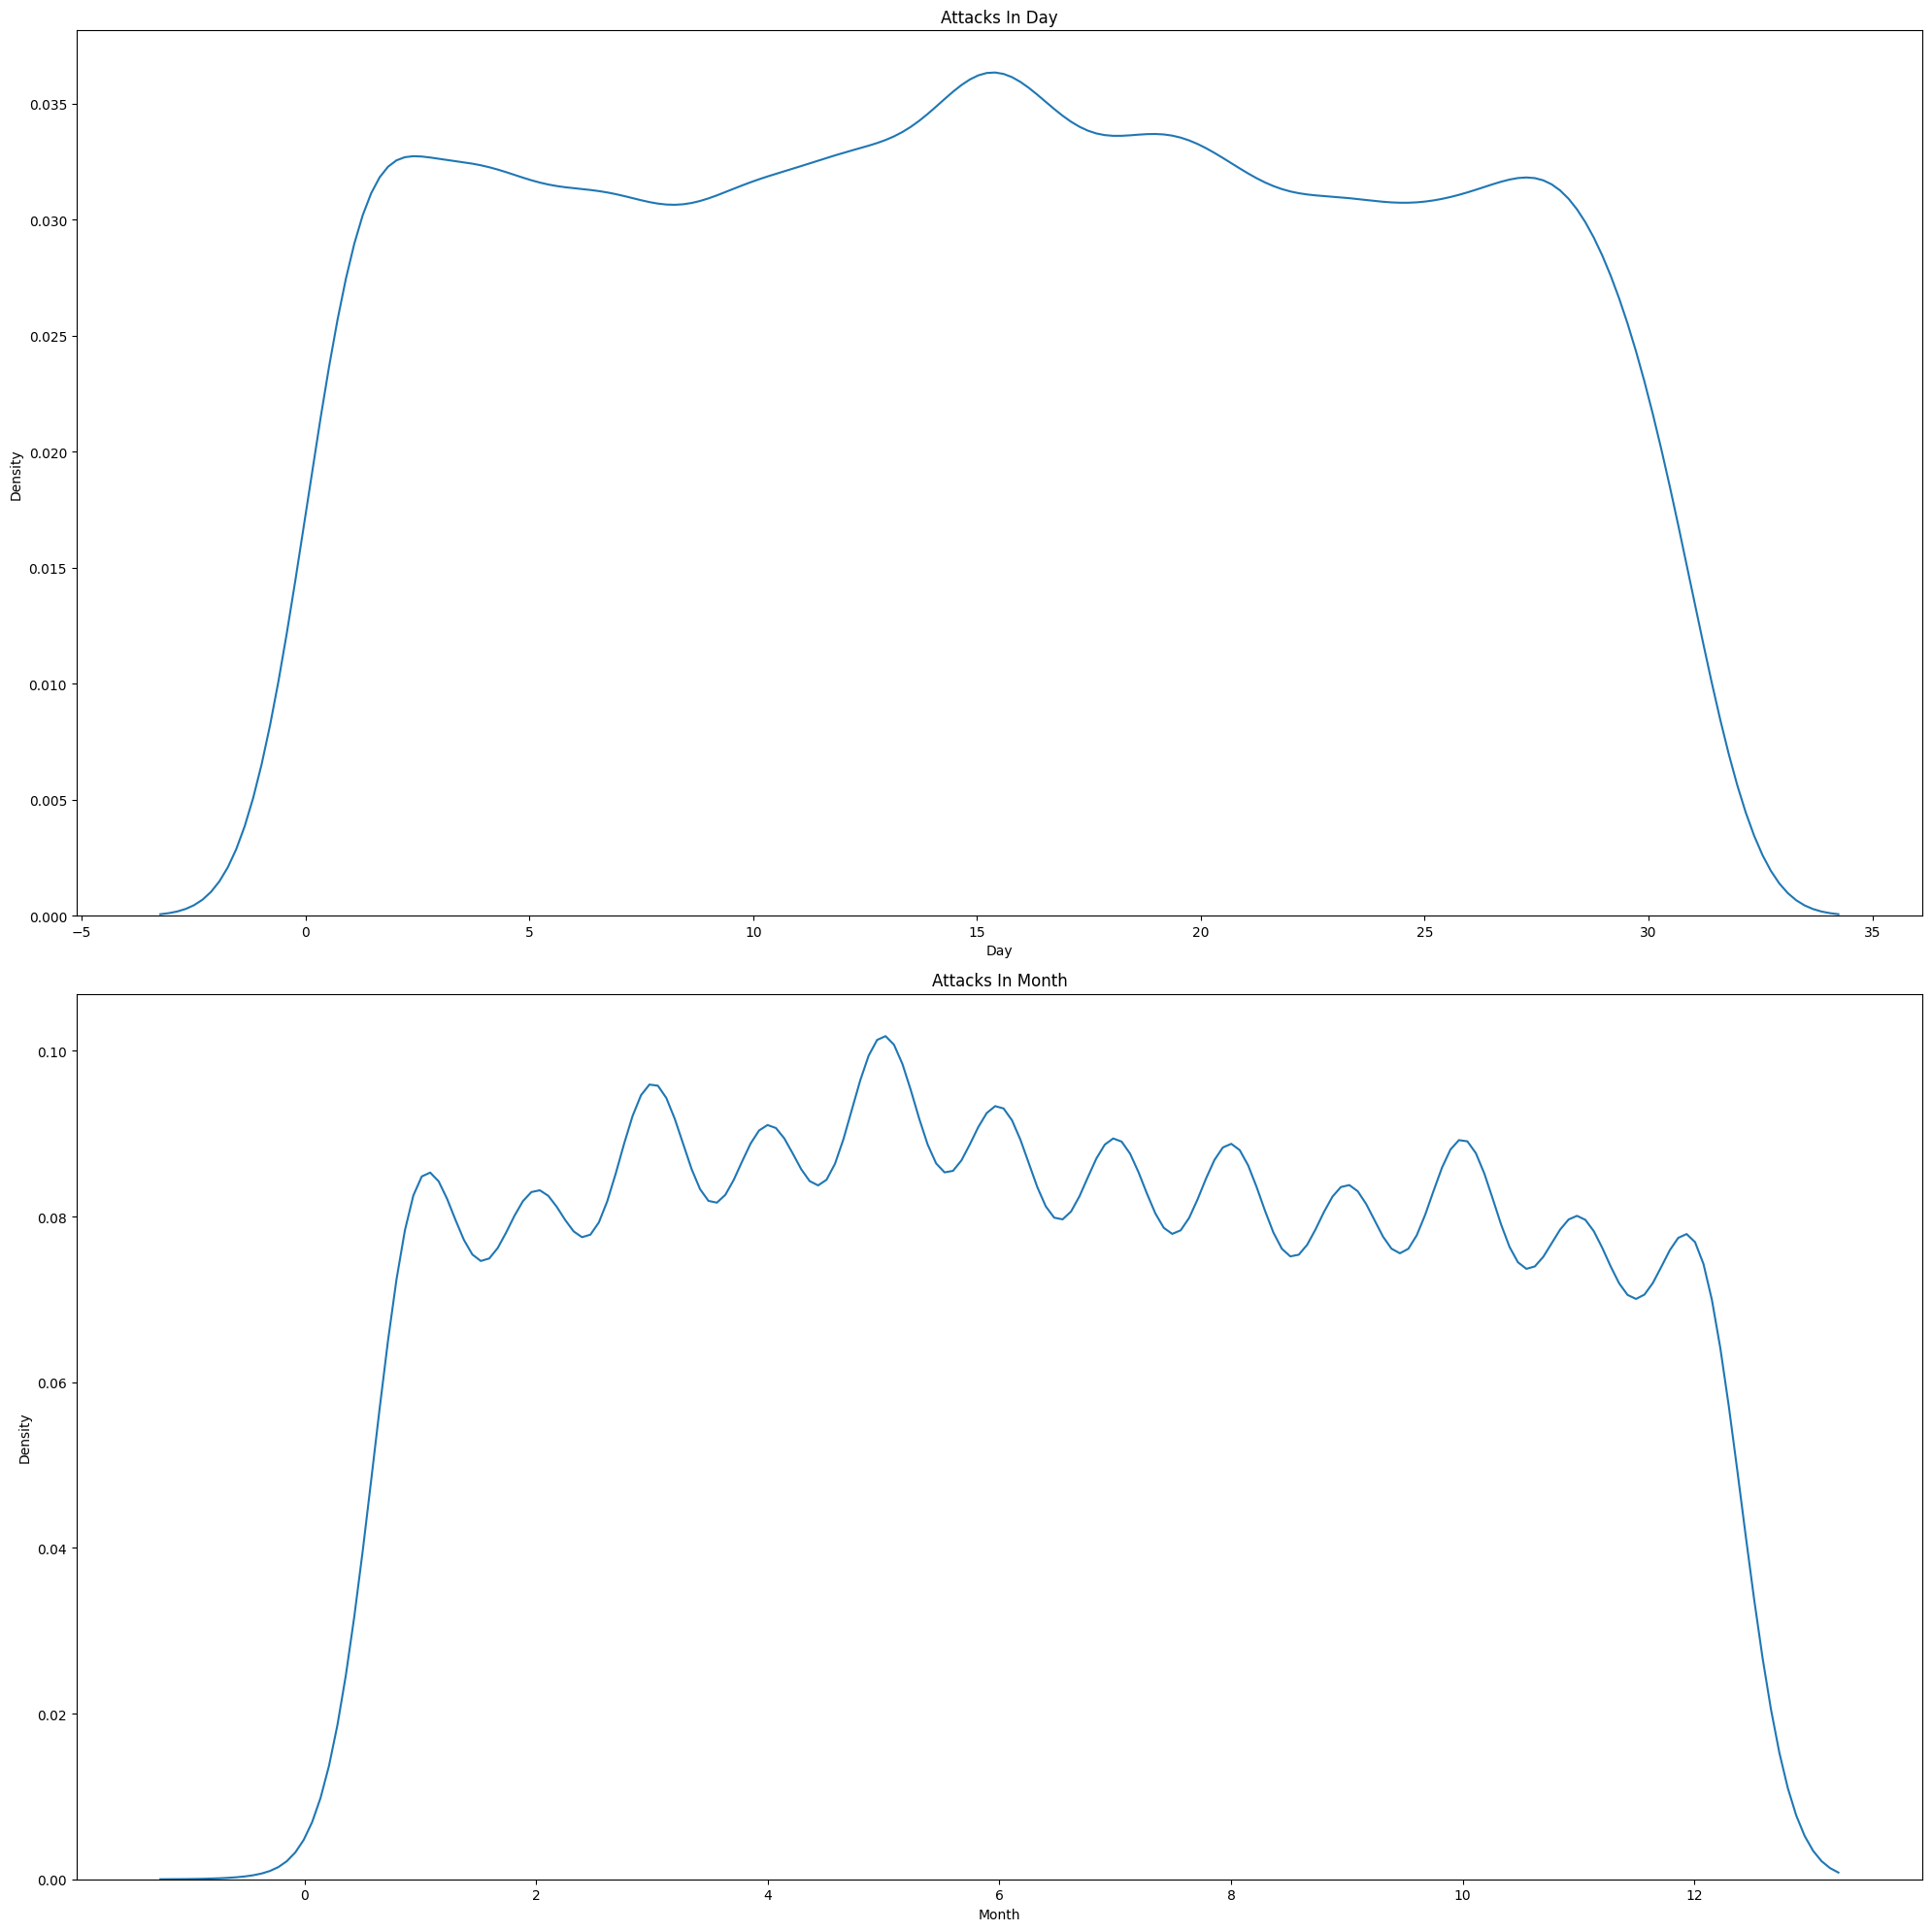

In [77]:
plt.figure(figsize=(20,20))
heading=['Attacks In Day','Attacks In Month']
columns=['Day','Month']
for i,col in enumerate(columns):
  plt.subplot(2,1,i+1)
  plt.title(heading[i])
  sns.kdeplot(x=df[col])
plt.tight_layout()
plt.show()

<Axes: >

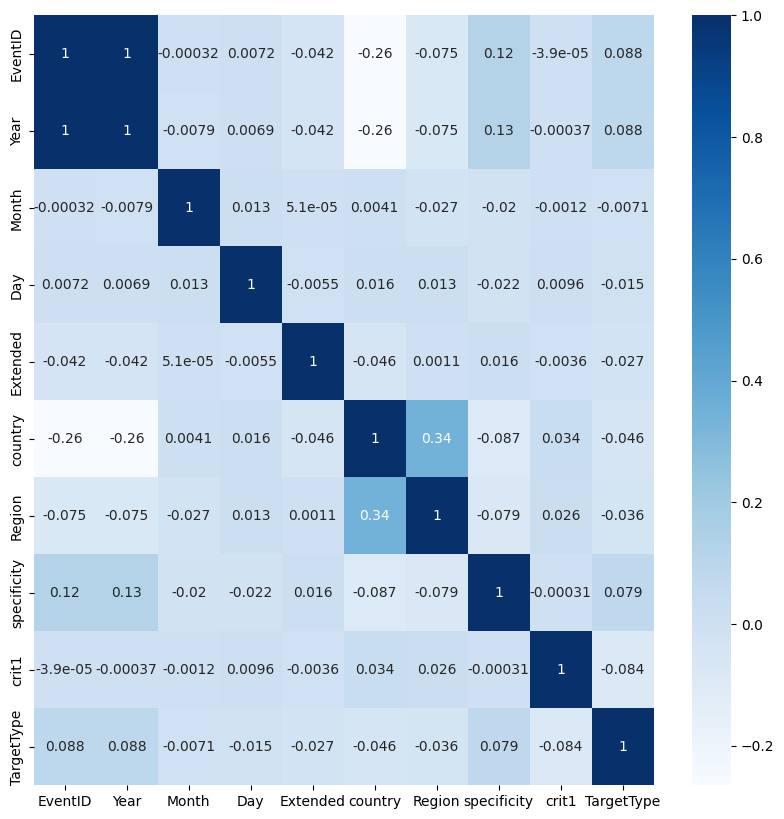

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<Axes: >

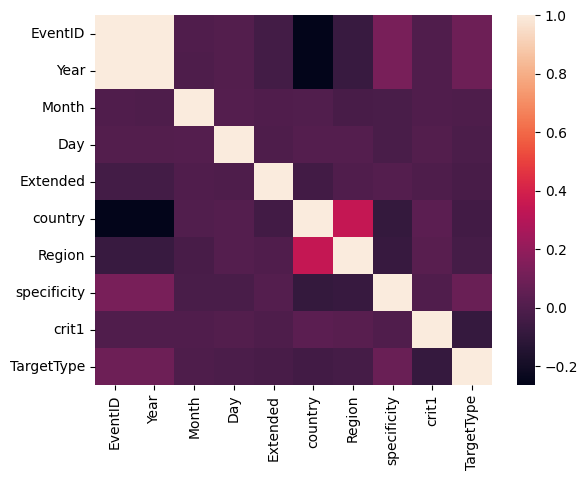

In [79]:
sns.heatmap(df.corr())

<Axes: >

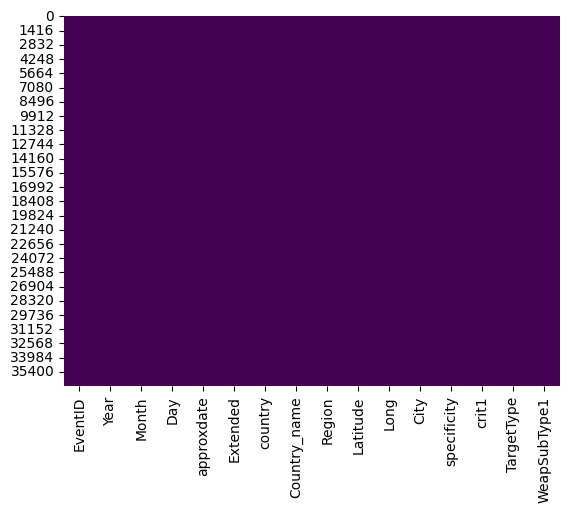

In [80]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

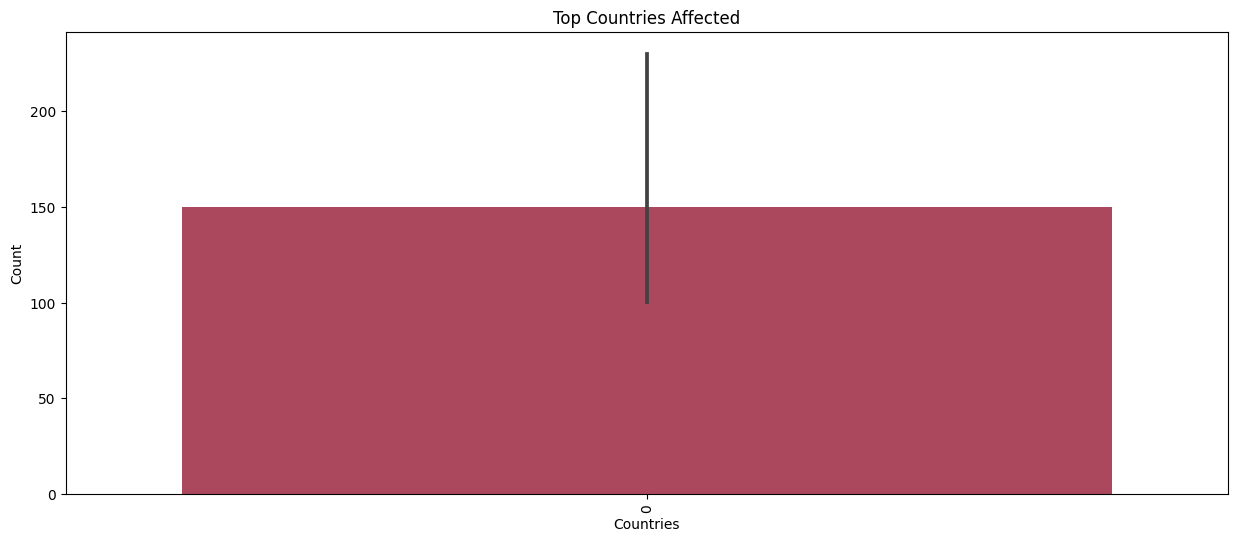

In [81]:
plt.subplots(figsize=(15,6))
sns.barplot(df['country'].value_counts()[:15].index,palette='inferno')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

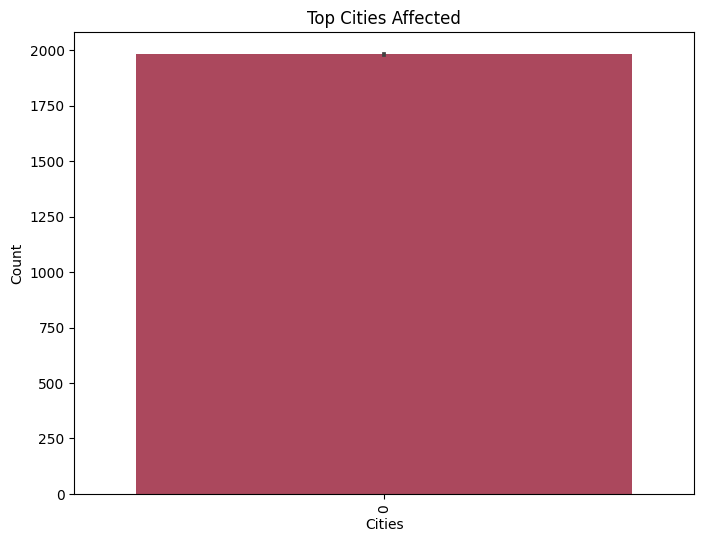

In [82]:
plt.subplots(figsize=(8,6))
sns.barplot(df['Year'].value_counts()[1:15].index,palette='inferno')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


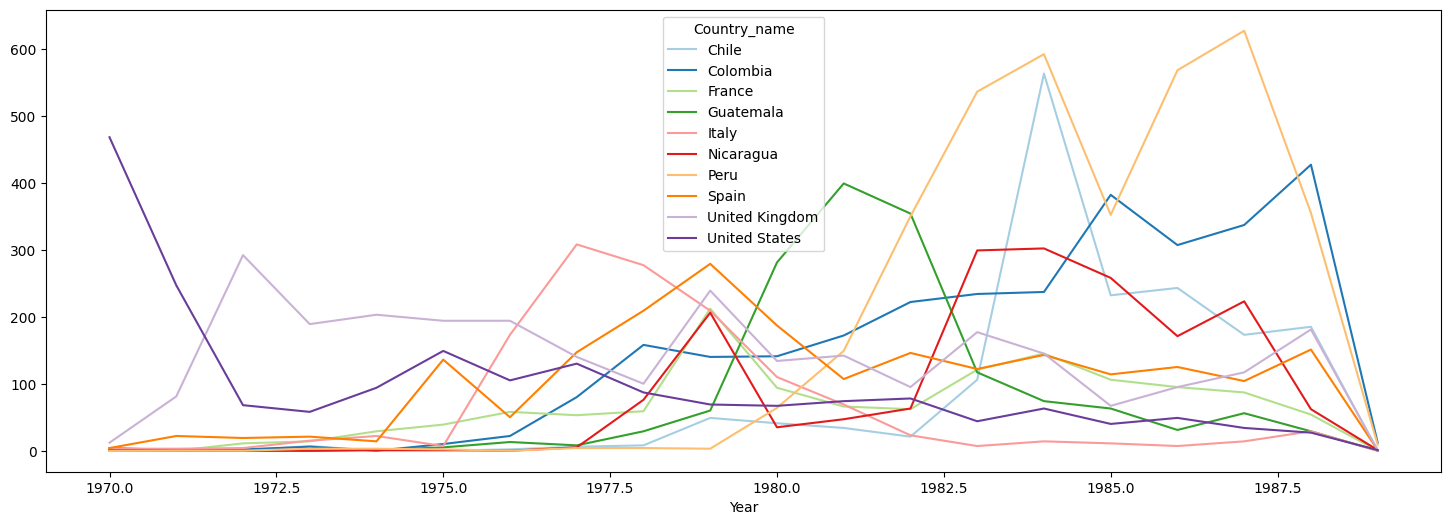

In [83]:
top_groups10=df[df['Country_name'].isin(df['Country_name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Country_name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

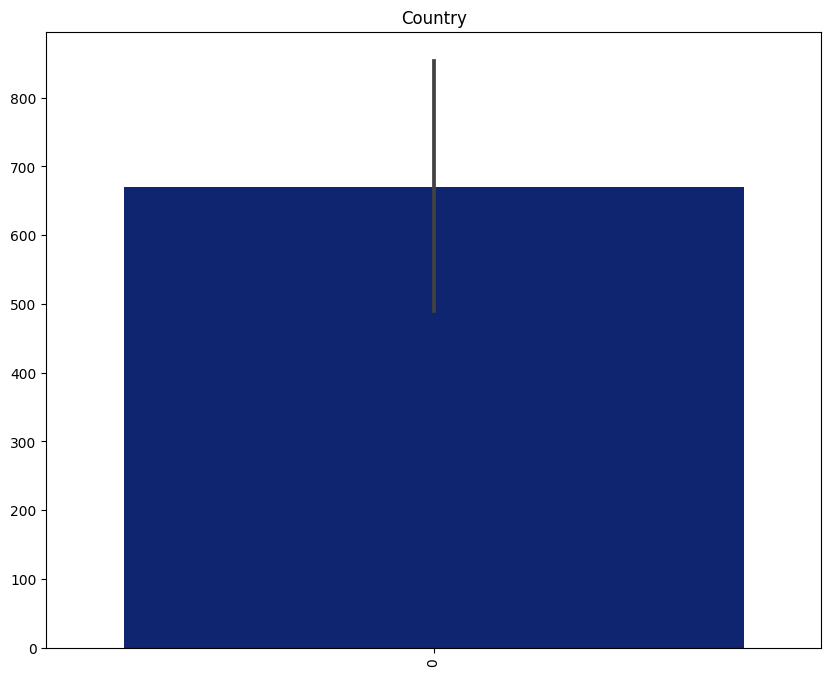

In [84]:
sns.barplot(df['Latitude'].value_counts()[1:15].values,palette=('dark'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Country')
plt.show()

In [86]:
df['WeapSubType1'].value_counts()

Unknown Explosive Type                       13631
Automatic or Semi-Automatic Rifle             8092
0                                             6202
Handgun                                       2471
Unknown Gun Type                              2268
Vehicle                                        610
Dynamite/TNT                                   601
Grenade                                        422
Projectile (rockets, mortars, RPGs, etc.)      417
Rifle/Shotgun (non-automatic)                  379
Landmine                                       334
Molotov Cocktail/Petrol Bomb                   257
Arson/Fire                                     186
Letter Bomb                                    181
Time Fuse                                      166
Knife or Other Sharp Object                    139
Pipe Bomb                                      130
Gasoline or Alcohol                            107
Other Explosive Type                            65
Remote Trigger                 